## Importacion de librerias

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

#from sklearn import metrics%matplotlib inline


## Leer el dataset

In [74]:
df = pd.read_csv('Laboratorio_dataset_car.csv', sep=';')
df.head(5)


,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


In [76]:
df.shape

(1750, 7)

In [77]:
df.columns

Index(['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety',
       'class'],
      dtype='object')

## Validamos que no tengamos valores nulos

In [78]:
df.isnull().sum()

Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64

## Contamos con las condiciones del vehiculo para analizar

In [79]:
df['class'].value_counts()

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

## Graficamos las cantidades de las codiciones de los vehiculos

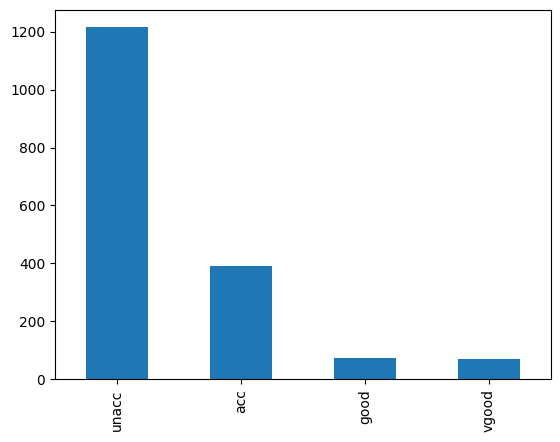

In [80]:
df['class'].value_counts().plot(kind='bar')
plt.show()

## Analizamosel nivel de seguridad del vehiculo

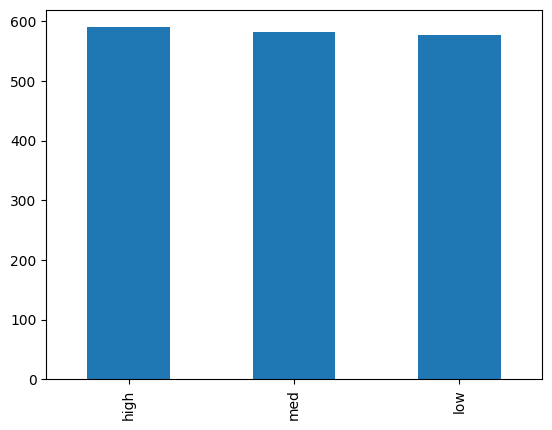

In [81]:
df['safety'].value_counts().plot(kind = 'bar')
plt.show()

## Analizamos la cantidad de vehiculos adquiridos por su calidad

<AxesSubplot: xlabel='Buying', ylabel='count'>

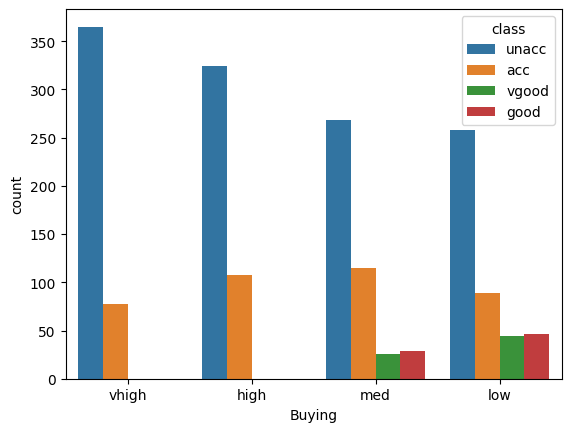

In [82]:
sns.countplot(data = df, x="Buying",hue="class")

## Procesamiento de datos
### Separa variables dependientes de las independietes

In [83]:
x = df.drop(['class'],axis=1)
y = df['class']

### Convertimos las variables para su manipulacion con Scikit-learn

In [84]:
Buying = ['low', 'med', 'high', 'vhigh']
Maintenance = ['low', 'med', 'high', 'vhigh']
Doors = ['2', '3', '4', '5more']
Person = ['2', '4', 'more']
lug_boot = ['small', 'med', 'big']
safety = ['low', 'med', 'high']
all_categories = [Buying, Maintenance,Doors,Person,lug_boot,safety]
oe = OrdinalEncoder(categories= all_categories)
X = oe.fit_transform( df[['Buying', 'Maintenance', 'Doors', 'Person', 'lug_boot', 'safety']])

### Dividimos los datos para pruebas y entrenamiento

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)

### Aplicamos el algoritmo de arbol de decision

In [86]:
z = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)

In [87]:
z.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

### Predecimos con los datos de pruebas

In [88]:
y_pred = z.predict(X_test)


### Usamos una matriz de confusion para encontrar el rendimiento del modelo y del algoritmo

In [89]:
confusion_matrix(y_test, y_pred)

array([[ 63,   0,  52,   0],
       [ 22,   0,   0,   0],
       [ 12,   0, 360,   0],
       [ 16,   0,   0,   0]], dtype=int64)

In [94]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         acc       0.56      0.55      0.55       115
        good       0.00      0.00      0.00        22
       unacc       0.87      0.97      0.92       372
       vgood       0.00      0.00      0.00        16

    accuracy                           0.81       525
   macro avg       0.36      0.38      0.37       525
weighted avg       0.74      0.81      0.77       525



C:\Users\pillo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pillo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pillo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334

### Analisis del modelo para comprender como se predice si un vehiculo es aceptable o no

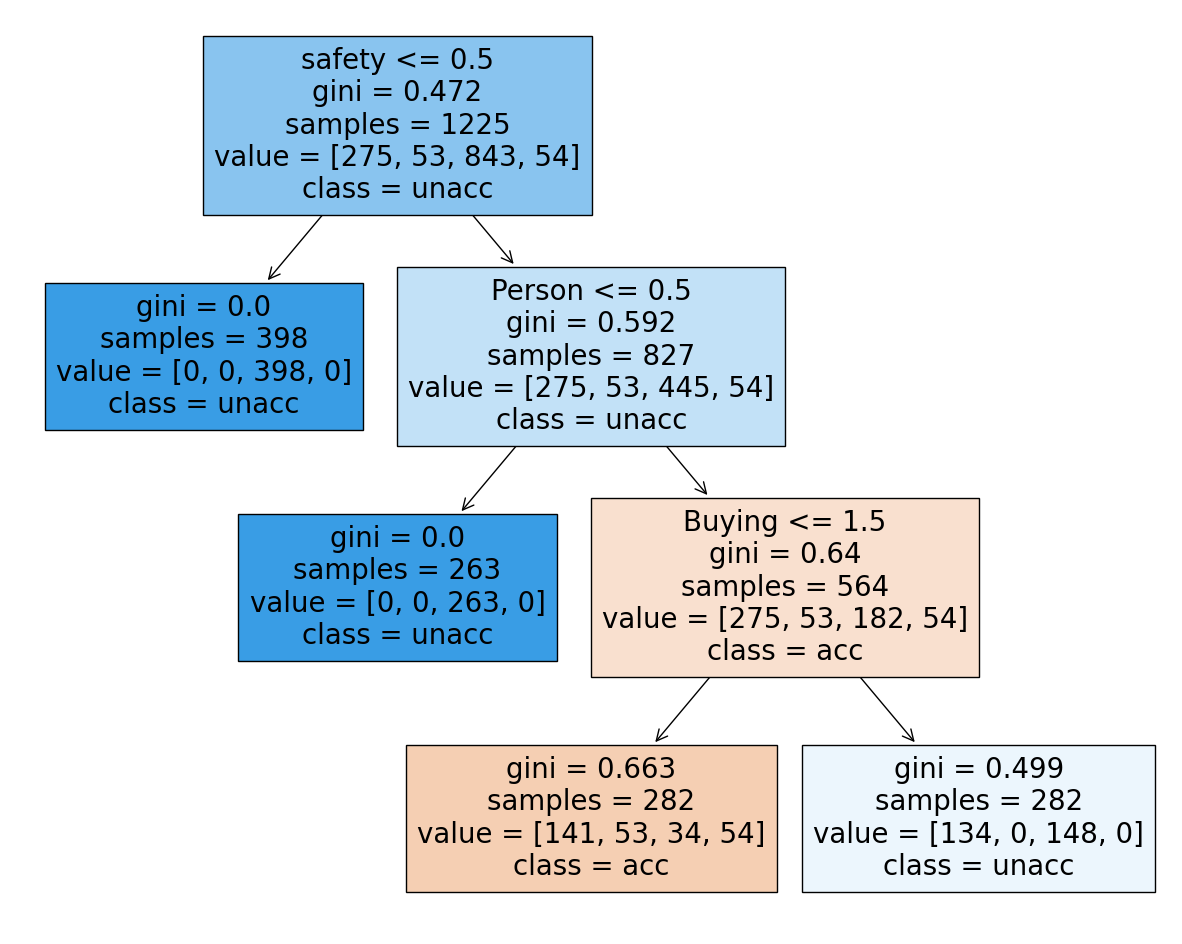

In [90]:
fig = plt.figure(figsize=(15,12))
_ = tree.plot_tree(z,
feature_names=df.columns[:-1],
class_names= z.classes_, filled=True)